In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [232]:
df= pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [233]:
df.info()
# There are 614 applicants as per the data and there are also null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [234]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [235]:
(df.isna().sum()/len(df))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [236]:
df.drop('Loan_ID', axis=1, inplace=True)

#Unwanted Column

# Handling Null Values


In [237]:
i=df[df['Gender'].isna()].index
df.drop(i,axis=0,inplace=True)

i=df[df['Dependents'].isna()].index
df.drop(i,axis=0,inplace=True)

i=df[df['Loan_Amount_Term'].isna()].index
df.drop(i,axis=0,inplace=True)

# As per the rules In this columns the null values were below 3 % so dropped rows with null value

In [238]:
df.Self_Employed.value_counts()

No     467
Yes     75
Name: Self_Employed, dtype: int64

In [239]:
df.Credit_History.value_counts()

1.0    449
0.0     75
Name: Credit_History, dtype: int64

In [240]:
from sklearn.impute import SimpleImputer

In [241]:
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df[["Self_Employed","Credit_History"]]=si.fit_transform(df[["Self_Employed","Credit_History"]])

# Classified data so filled null values with the mode

In [242]:
df['LoanAmount'].value_counts()

120.0    18
110.0    15
100.0    14
187.0    12
128.0    11
         ..
42.0      1
72.0      1
240.0     1
214.0     1
253.0     1
Name: LoanAmount, Length: 199, dtype: int64

In [243]:
lamean=df['LoanAmount'].mean()
df['LoanAmount'].fillna(lamean,inplace=True)

In [244]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

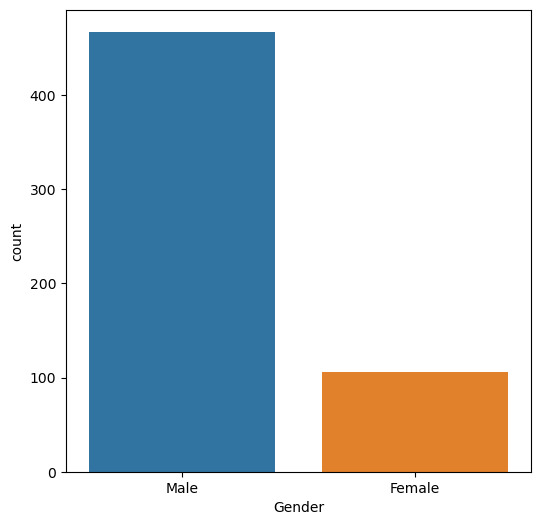

Male      467
Female    106
Name: Gender, dtype: int64 





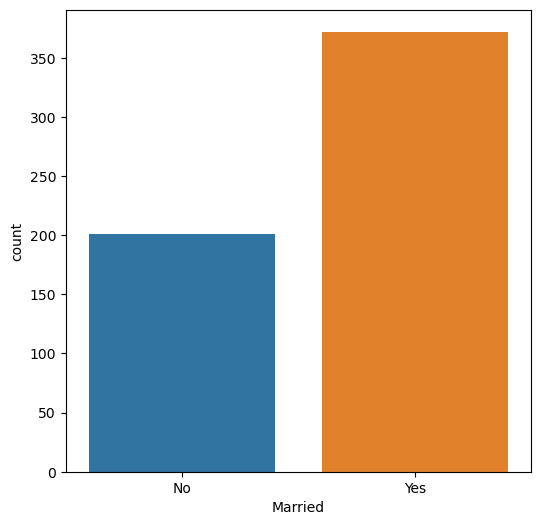

Yes    372
No     201
Name: Married, dtype: int64 





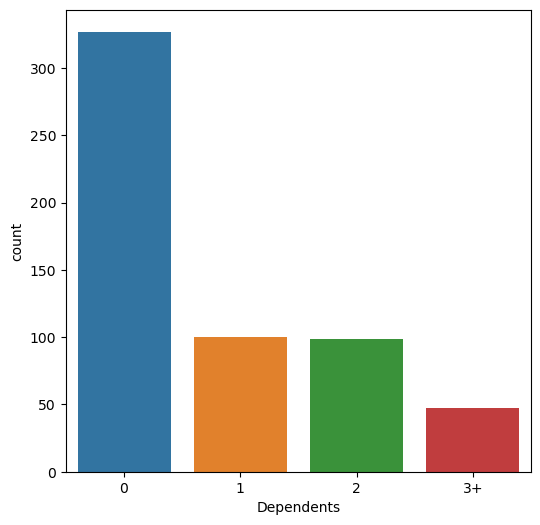

0     327
1     100
2      99
3+     47
Name: Dependents, dtype: int64 





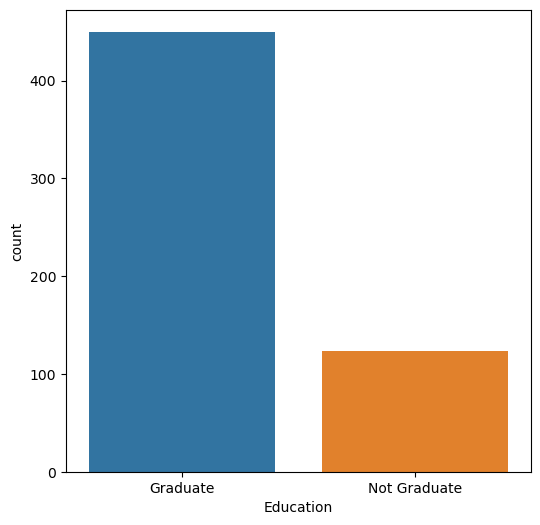

Graduate        450
Not Graduate    123
Name: Education, dtype: int64 





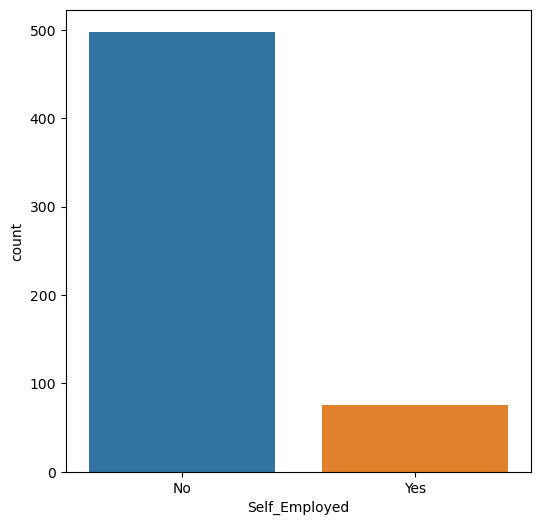

No     498
Yes     75
Name: Self_Employed, dtype: int64 





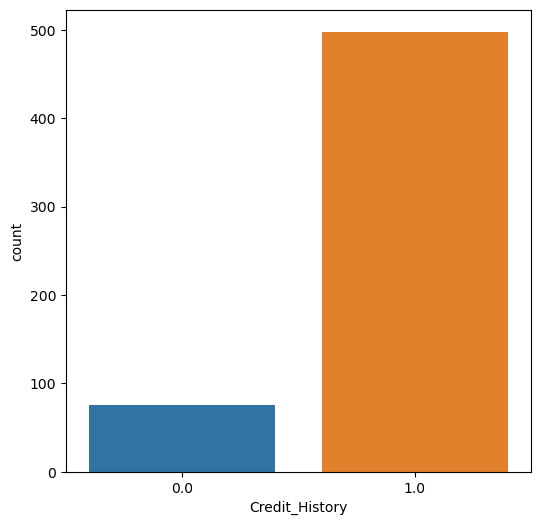

1.0    498
0.0     75
Name: Credit_History, dtype: int64 





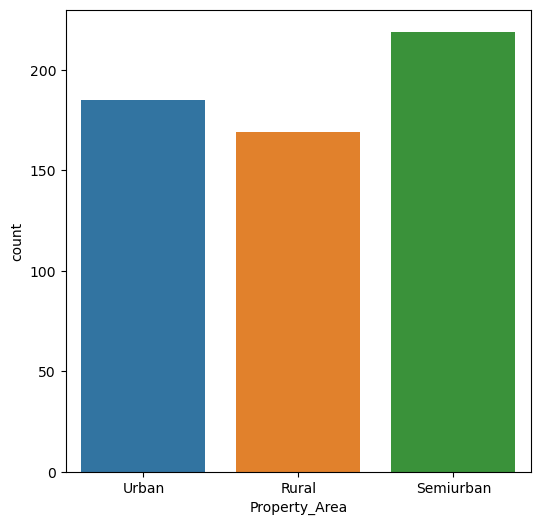

Semiurban    219
Urban        185
Rural        169
Name: Property_Area, dtype: int64 





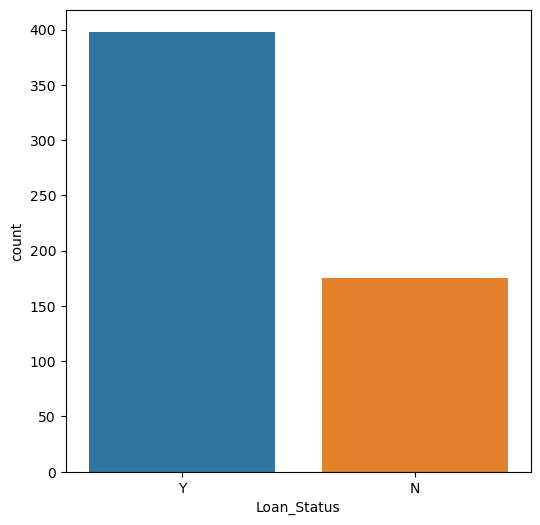

Y    398
N    175
Name: Loan_Status, dtype: int64 





In [245]:
colnames=df.select_dtypes(['object']).columns
for i in colnames:
    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=df[i])
    plt.show()
    print(df[i].value_counts(),'\n\n\n')
    
    
# Value counts of the columns

As per the data there are more mans as compared to womens. There are many married people and Graduates. There are many people from Semi Urban Area Also in the data people are less Self Employed. And in the data many people have took the Loan

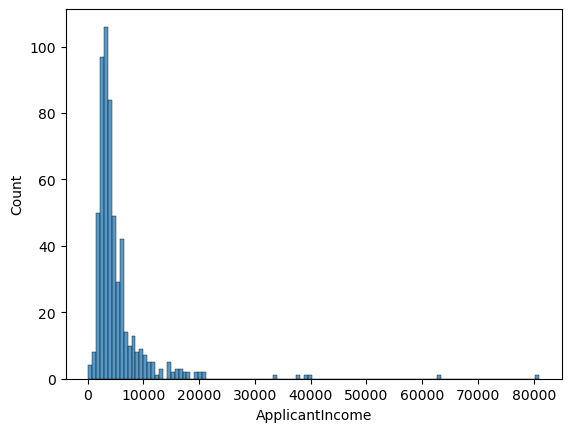

minimum ApplicantIncome 150 
maximum ApplicantIncome 81000 





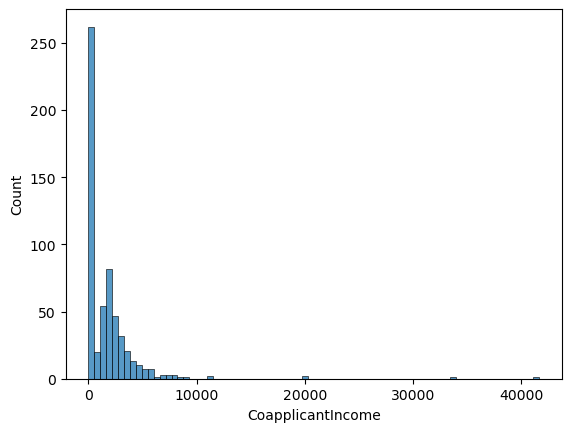

minimum CoapplicantIncome 0.0 
maximum CoapplicantIncome 41667.0 





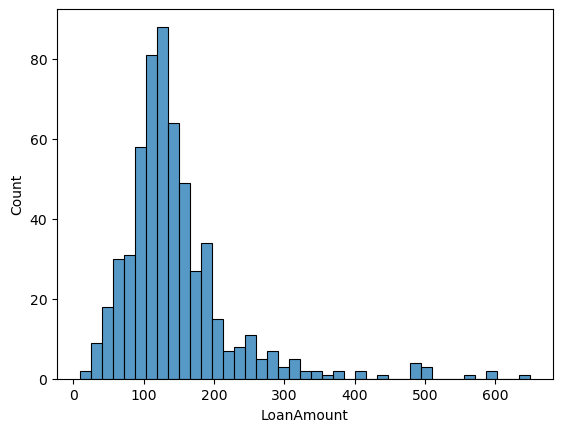

minimum LoanAmount 9.0 
maximum LoanAmount 650.0 





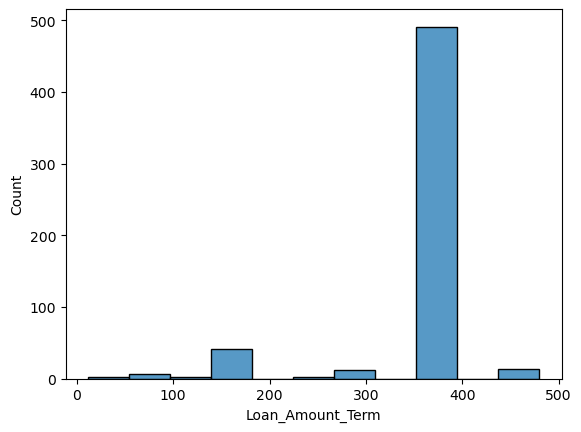

minimum Loan_Amount_Term 12.0 
maximum Loan_Amount_Term 480.0 





In [246]:
colnames=df.select_dtypes(['float','int']).columns
for i in colnames:
    sns.histplot(data=df, x=i)
    plt.show()
    print('minimum',i,df[i].min(),'\nmaximum',i,df[i].max(),'\n\n\n')

There are many applicants whos income varies between 2000-4000 and many people have took loan of amount between 110-150 and maximum people have loan amount term betweem 350-400

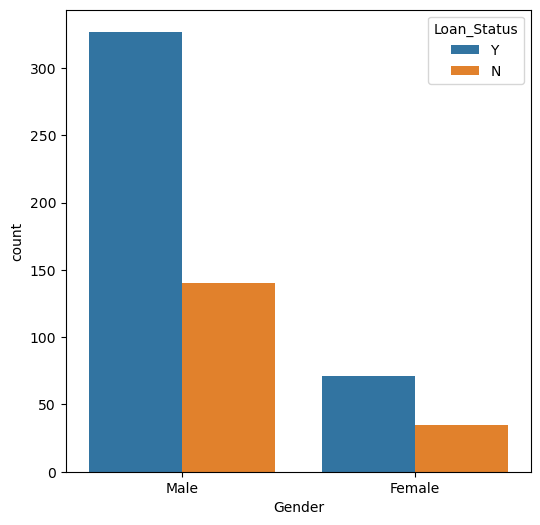

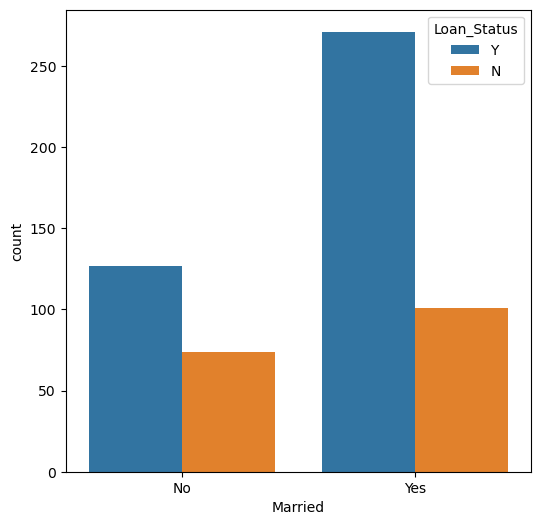

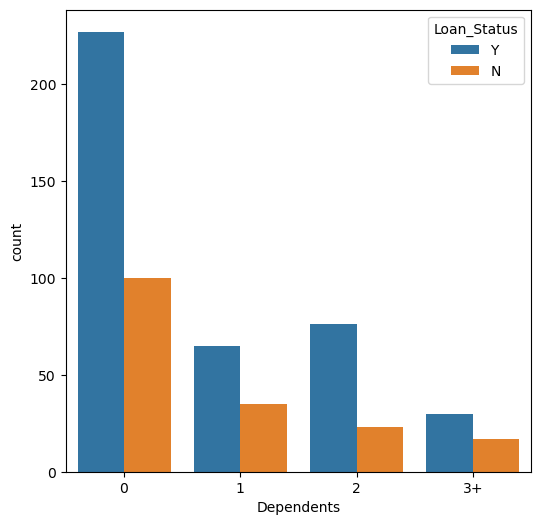

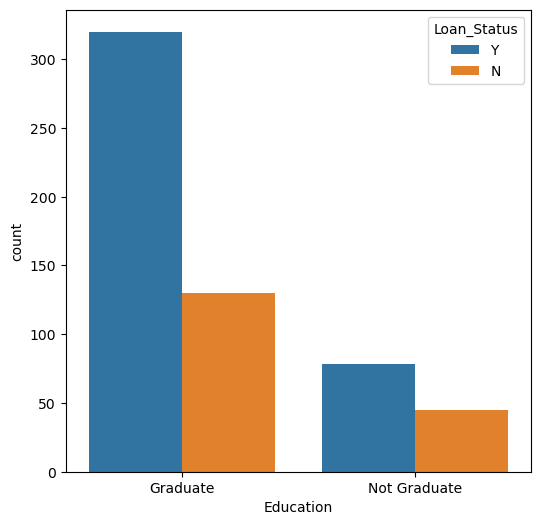

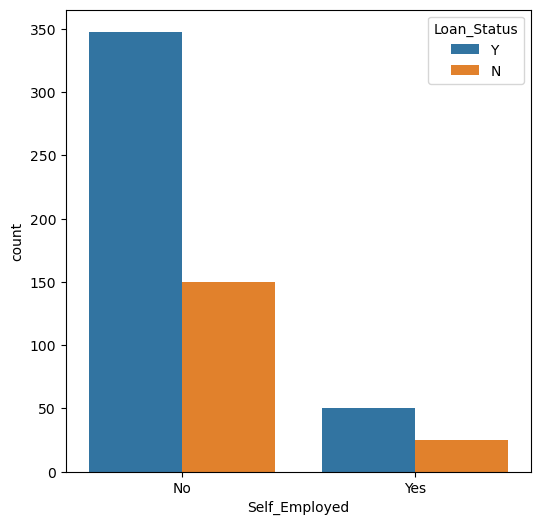

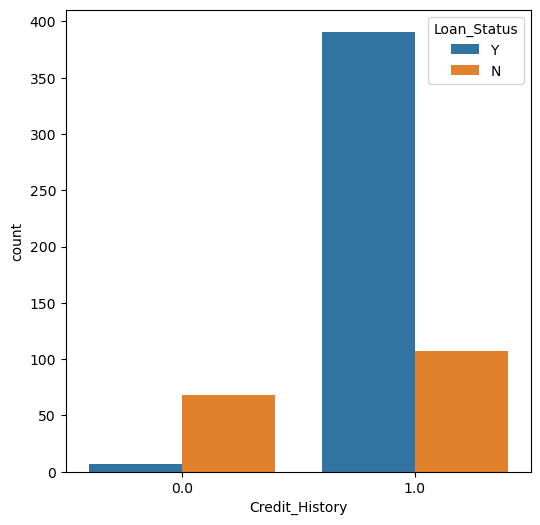

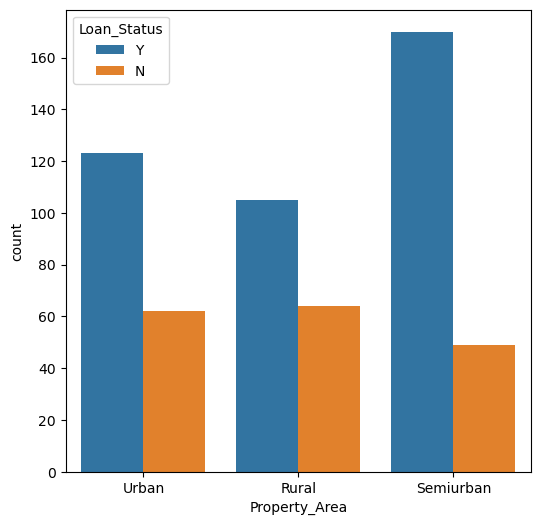

In [247]:
colnames=df.select_dtypes(['object']).columns
for i in colnames:
    if i == 'Loan_Status':
        continue
    else:
        plt.figure(figsize=(6,6))
        sns.countplot(data=df, x=df[i], hue=df['Loan_Status'])
        plt.show()

<AxesSubplot:>

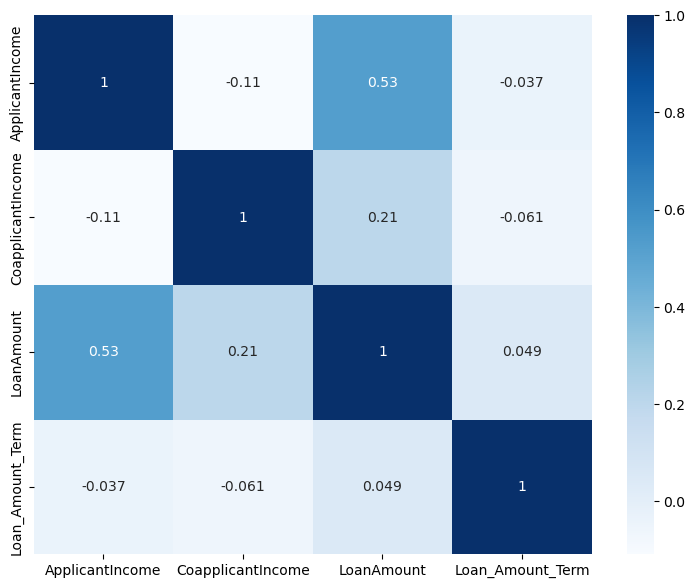

In [248]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot:>

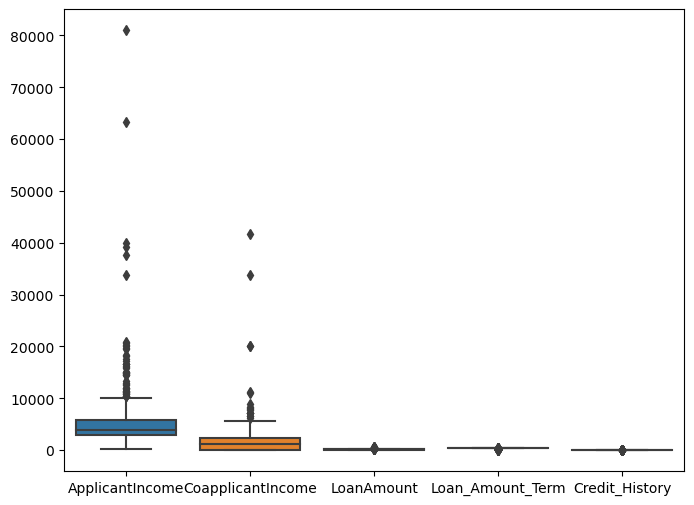

In [252]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)

# There are outliers which need to be treated in the data

# Preprocessing And Splitting Data

In [216]:
from sklearn.preprocessing import OrdinalEncoder 
cols=df.select_dtypes(["object"]).columns
oe=OrdinalEncoder()
df[cols]=oe.fit_transform(df[cols])

In [217]:
features=df.iloc[:,:-1]
print(features.head(1))
target=df.iloc[:,-1]
print(target.head(1))

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0        0.0            0.0             5849   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.001808             360.0             1.0   

   Property_Area  
0            2.0  
0    1.0
Name: Loan_Status, dtype: float64


In [218]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2, random_state=1,stratify=target)

In [219]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

# Applying Models


In [220]:
def mymodel(model):
    
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    tr=model.score(xtrain,ytrain)
    te=model.score(xtest,ytest)
    
    print(f'\n Training score : {tr}\n Testing score : {te}')
    
    print(classification_report(ytest,ypred))
    

In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [222]:
lr=mymodel(DecisionTreeClassifier())


 Training score : 1.0
 Testing score : 0.7565217391304347
              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56        35
         1.0       0.80      0.86      0.83        80

    accuracy                           0.76       115
   macro avg       0.71      0.69      0.70       115
weighted avg       0.75      0.76      0.75       115



In [223]:
knn=mymodel(KNeighborsClassifier())


 Training score : 0.8078602620087336
 Testing score : 0.8260869565217391
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.81      0.99      0.89        80

    accuracy                           0.83       115
   macro avg       0.87      0.72      0.75       115
weighted avg       0.85      0.83      0.80       115



In [224]:
lr=mymodel(LogisticRegression())


 Training score : 0.7969432314410481
 Testing score : 0.8260869565217391
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.81      0.99      0.89        80

    accuracy                           0.83       115
   macro avg       0.87      0.72      0.75       115
weighted avg       0.85      0.83      0.80       115



In [225]:
rfc=mymodel(RandomForestClassifier())


 Training score : 1.0
 Testing score : 0.8
              precision    recall  f1-score   support

         0.0       0.80      0.46      0.58        35
         1.0       0.80      0.95      0.87        80

    accuracy                           0.80       115
   macro avg       0.80      0.70      0.73       115
weighted avg       0.80      0.80      0.78       115



In [226]:
gnb=mymodel(GaussianNB())


 Training score : 0.7838427947598253
 Testing score : 0.808695652173913
              precision    recall  f1-score   support

         0.0       0.81      0.49      0.61        35
         1.0       0.81      0.95      0.87        80

    accuracy                           0.81       115
   macro avg       0.81      0.72      0.74       115
weighted avg       0.81      0.81      0.79       115



In [227]:
svc=mymodel(SVC())


 Training score : 0.8144104803493449
 Testing score : 0.8260869565217391
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62        35
         1.0       0.81      0.99      0.89        80

    accuracy                           0.83       115
   macro avg       0.87      0.72      0.75       115
weighted avg       0.85      0.83      0.80       115



In [228]:
trainac=[]
testac=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)
    

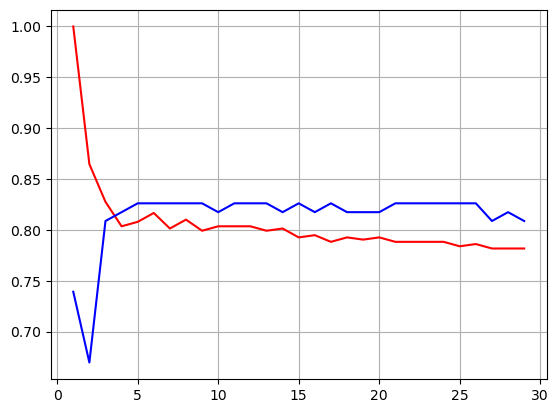

In [229]:
plt.plot(range(1,30),trainac,color='red')
plt.plot(range(1,30),testac,color='blue')
plt.grid()
plt.show()

In [230]:
knn=mymodel(KNeighborsClassifier(n_neighbors=3))


 Training score : 0.8275109170305677
 Testing score : 0.808695652173913
              precision    recall  f1-score   support

         0.0       0.84      0.46      0.59        35
         1.0       0.80      0.96      0.88        80

    accuracy                           0.81       115
   macro avg       0.82      0.71      0.73       115
weighted avg       0.81      0.81      0.79       115



After applying several models like *K Neighbors Classifier, Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gaussian NB, SVC, AdaBoost Classifier* 

The Best Model which Shows *good accuracy is SVC the accuracy is 83%* 